In [3]:
import pandas as pd
df = pd.read_csv("gold.csv")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [22]:
x = np.array(df[['Year']])
print(x)
y = df.iloc[:,-1]
y

[[2022]
 [2021]
 [2020]
 [2019]
 [2018]
 [2017]
 [2016]
 [2015]
 [2014]
 [2013]
 [2012]
 [2011]
 [2010]
 [2009]
 [2008]
 [2007]
 [2006]
 [2005]
 [2004]
 [2003]
 [2002]
 [2001]
 [2000]
 [1999]
 [1998]
 [1997]
 [1996]
 [1995]
 [1994]
 [1993]
 [1992]
 [1991]
 [1990]
 [1989]
 [1988]
 [1987]
 [1986]
 [1985]
 [1984]
 [1983]
 [1982]
 [1981]
 [1980]
 [1979]
 [1978]
 [1977]
 [1976]
 [1975]
 [1974]
 [1973]
 [1972]
 [1971]
 [1970]
 [1969]
 [1968]
 [1967]
 [1966]
 [1965]]


0     52950
1     50045
2     48651
3     35220
4     31438
5     29667
6     28623
7     26343
8     28006
9     29600
10    31050
11    26400
12    18500
13    14500
14    12500
15    10800
16     8400
17     7000
18     5850
19     5600
20     4990
21     4300
22     4400
23     4234
24     4045
25     4725
26     5160
27     4680
28     4598
29     4140
30     4334
31     3466
32     3200
33     3140
34     3130
35     2570
36     2140
37     2130
38     1970
39     1800
40     1645
41     1800
42     1330
43      937
44      685
45      486
46      432
47      540
48      506
49      279
50      202
51      193
52      184
53      176
54      162
55      103
56       84
57       72
Name: Price, dtype: int64

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)

In [24]:
print(y_train.shape)
print(x_train.shape)

(46,)
(46, 1)


In [25]:
regr = LinearRegression()
model = regr.fit(x_train,y_train)

In [28]:
df['Y_hat'] = model.predict(x)
print(df.head())

   Year  Price         Y_hat
0  2022  52950  27207.070646
1  2021  50045  26591.253295
2  2020  48651  25975.435945
3  2019  35220  25359.618594
4  2018  31438  24743.801244


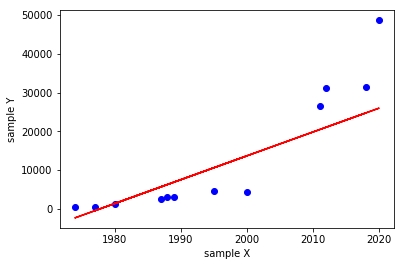

In [30]:
from matplotlib import pyplot as plt
plt.scatter(x_test,y_test,color = 'blue')
plt.plot(x_test,model.predict(x_test),color = 'red')
plt.xlabel('sample X')
plt.ylabel('sample Y')
plt.show()

In [31]:
ans_by_sklearn = model.predict([[2025]])
print(ans_by_sklearn)

[29054.52269729]


now we need to compute the answer by the basic implementation

In [32]:
sum_x = np.sum(x)
sum_y = np.sum(y)

In [44]:
df['xy'] = df['Price']*df['Year']
df['x_square'] = df['Year']*df['Year']

In [48]:
sum_xy = np.sum(df['xy'])
n = df.shape[0]
sum_x_2 = np.sum(df['x_square'])

for the values computed now we need to compute the coeff b1 and b0 for the expression

In [49]:
b1 = ((n*sum_xy) - (sum_x*sum_y))/((n*sum_x_2) - (sum_x*sum_x))
print(b1)

675.343658679135


In [51]:
b0 = (sum_y - (sum_x * b1))/n
print(b0)

-1336226.704266511


from the coeficiemts we can compute the values.

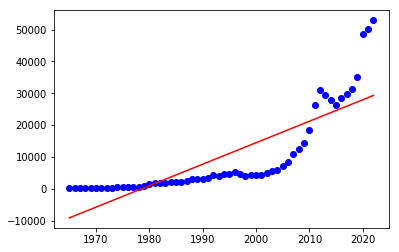

In [53]:
plt.scatter(x,y,color = 'blue')
plt.plot(x,(b0 + (b1*x)),color = 'red')
plt.show()

In [55]:
ans_by_imple = (b1*2025) + b0
print(ans_by_imple)

31344.204558737576


the difference between the implementation is as given below

In [57]:
dif = ans_by_imple - ans_by_sklearn
print(dif)

[2289.68186145]


**RESULT :**
implementation has almost a 2289 higher price than the implementation by sklearn